# **Decision Tree Model**

MAE: 11.351570884028867
MSE: 252.5039660137137
RMSE: 15.890373375528773
R² score: 0.8584040804581372


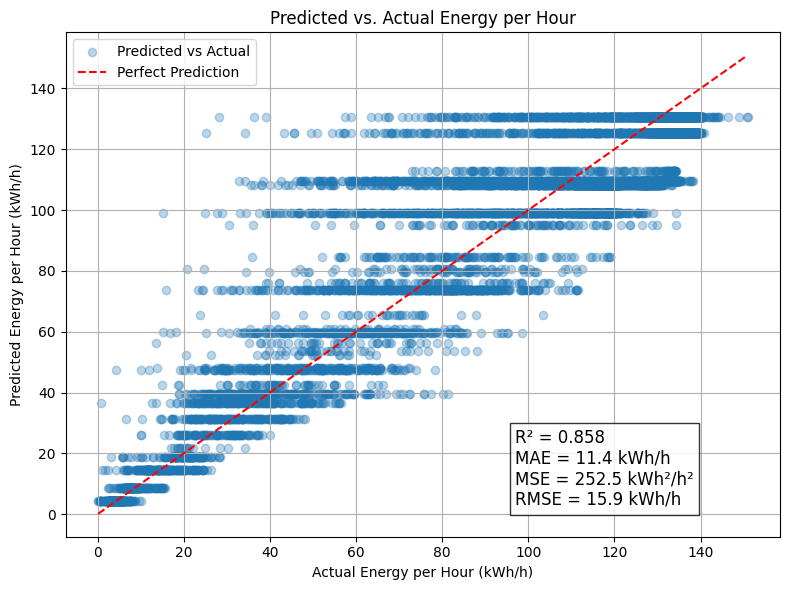

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load data
df = pd.read_csv("energydata_with_cost.csv")

# 2. Keep only relevant numeric columns and drop rows with missing values
columns = [
    "sessionDurationMs", "chargingDurationMs", "maxPowerKw", "socStart",
    "socEnd", "evMaximumCurrent", "evMaximumPower", "evMaximumVoltage",
    "chargedEnergyKwh"
]
df = df[columns].apply(pd.to_numeric, errors="coerce").dropna()

# 3. Calculate the target variable: energy consumption per hour (kWh/h)
df["energy_per_hour"] = df["chargedEnergyKwh"] / (df["chargingDurationMs"] / 3600000.0)

# 4. Split features and target
X = df.drop(columns=["chargedEnergyKwh", "energy_per_hour"])
y = df["energy_per_hour"]

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 7. Make predictions
y_pred = model.predict(X_test)

# 8. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² score:", r2)

# Bereken evaluatiestatistieken
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")

plt.xlabel("Actual Energy per Hour (kWh/h)")
plt.ylabel("Predicted Energy per Hour (kWh/h)")
plt.title("Predicted vs. Actual Energy per Hour")
plt.grid(True)
plt.legend()

# Evaluatie-informatie
metrics_text = (
    f"R² = {r2:.3f}\n"
    f"MAE = {mae:.1f} kWh/h\n"
    f"MSE = {mse:.1f} kWh²/h²\n"
    f"RMSE = {rmse:.1f} kWh/h"
)

plt.gcf().text(0.65, 0.15, metrics_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# **Results**

### The scatter plot shows the relationship between actual and predicted energy consumption per hour (kWh/h) for electric bus charging, using a Decision Tree Regressor. The red dashed line represents perfect predictions, and most data points lie close to this line, indicating good model performance.

#### The evaluation metrics confirm this:

#### **R² = 0.858** shows that **85.8%** of the variation in energy usage is explained by the model.

#### **MAE = 11.4 kWh/h and RMSE = 15.9 kWh/h** indicate that the average prediction error is relatively small compared to typical charging rates (around 110 kWh/h).

There is some spread in the data, especially at higher or lower consumption levels, but the overall trend is well captured. The model slightly under- or overestimates certain cases, but there are no extreme outliers or systematic bias.

The unit kWh/h is equivalent to kilowatts (kW), representing average charging power. This model could be used to forecast charging demand, optimize station load, or detect unusual behavior.

Overall, the Decision Tree provides strong, interpretable predictions with acceptable error, making it a suitable baseline model for energy usage forecasting in this context.

# **Optimalization**

🔧 Best parameters found: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2}
Model performance:
MAE  = 6.44 kWh/h
RMSE = 10.47 kWh/h
R²   = 0.939


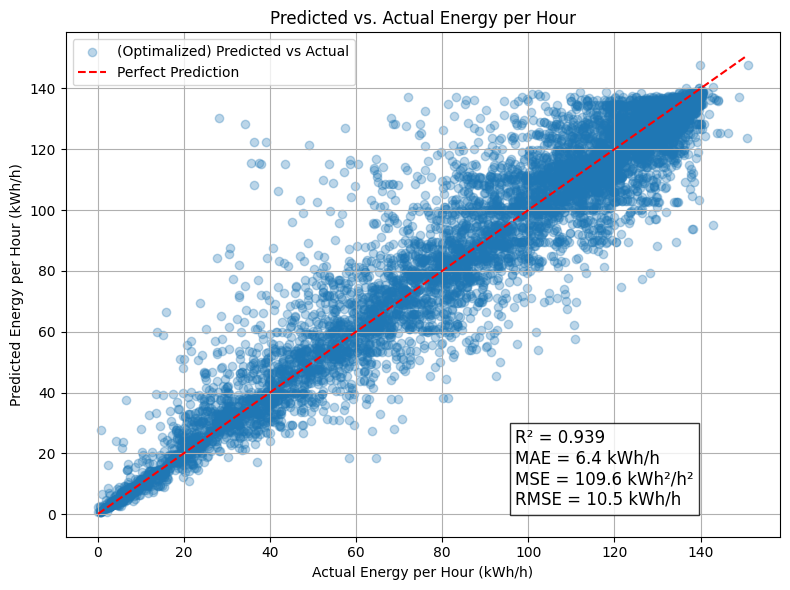

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_
print("🔧 Best parameters found:", grid_search.best_params_)

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model performance:")
print(f"MAE  = {mae:.2f} kWh/h")
print(f"RMSE = {rmse:.2f} kWh/h")
print(f"R²   = {r2:.3f}")

# Re-run and plot the optimized decision tree model

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Text block for metrics
metrics_text = (
    f"R² = {r2:.3f}\n"
    f"MAE = {mae:.1f} kWh/h\n"
    f"MSE = {mse:.1f} kWh²/h²\n"
    f"RMSE = {rmse:.1f} kWh/h"
)

# Plot predicted vs actual with metrics box in bottom-right
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, label="(Optimalized) Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Energy per Hour (kWh/h)")
plt.ylabel("Predicted Energy per Hour (kWh/h)")
plt.title("Predicted vs. Actual Energy per Hour")
plt.grid(True)
plt.legend()

# Place metrics in bottom-right
plt.gcf().text(0.65, 0.15, metrics_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


#**Results (Optimized Model)**

###The scatter plot shows the relationship between actual and predicted energy consumption per hour (kWh/h) for electric bus charging, using an optimized Decision Tree Regressor. The red dashed line represents perfect predictions, and most data points now lie even closer to this line, indicating improved model performance.

###**The updated evaluation metrics confirm this:**

**R² = 0.939** shows that **93.9%** of the variation in energy usage is explained by the model.

**MAE = 6.4 kWh/h and RMSE = 10.5 kWh/h** indicate that the average prediction error is significantly reduced compared to the unoptimized version (from 11.4 → 6.4 kWh/h).

**The MSE = 109.6 kWh²/h²**, much lower than the previous 252.5, further confirms this improvement.

There is still some spread at high usage levels, but overall the trend is tighter and more aligned with actual values. The optimized model captures patterns more accurately and reduces over/underestimation.

###**This suggests that:**

The optimization effectively tunes the decision tree’s structure (depth, split rules).

The model is now more suitable for charging demand forecasting, station load management, or anomaly detection.

Overall, the optimized model provides stronger, more reliable predictions with lower error, making it an excellent candidate for energy usage forecasting.

In [69]:
# Reload the data to ensure we have all original columns again
df = pd.read_csv("energydata_with_cost.csv")

# Recalculate energy_per_hour
df["energy_per_hour"] = df["chargedEnergyKwh"] / (df["chargingDurationMs"] / 3600000.0)

# Convert timestamp and extract hour
df["chargingStartTime"] = pd.to_datetime(df["chargingStartTime"], errors="coerce")
df = df.dropna(subset=["chargingStartTime"])
df["hour_of_day"] = df["chargingStartTime"].dt.hour

# 1. Describe energy_per_hour
energy_stats = df["energy_per_hour"].describe()

# 2. Number of charging sessions per hour of day
sessions_per_hour = df["hour_of_day"].value_counts().sort_index()

# 3. Total charged energy per hour of day
total_energy_per_hour = df.groupby("hour_of_day")["chargedEnergyKwh"].sum()

# 4. Median energy per hour of day
median_energy_per_hour = df.groupby("hour_of_day")["energy_per_hour"].median()


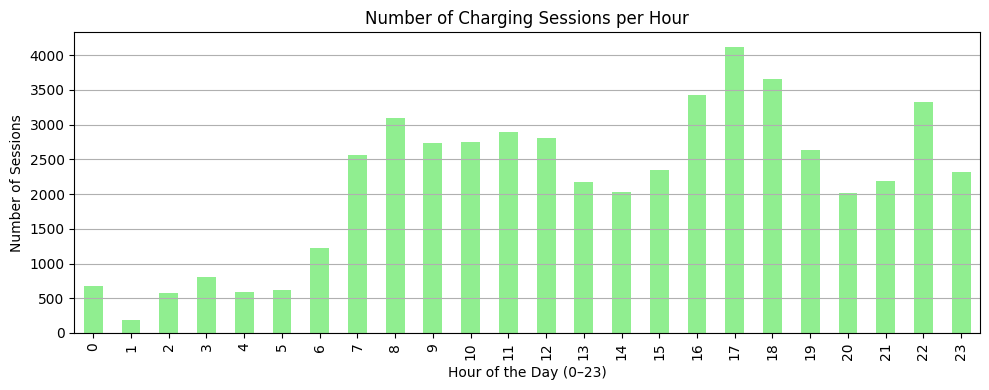

In [70]:
# Plot 1: Number of sessions per hour
plt.figure(figsize=(10, 4))
sessions_per_hour.plot(kind="bar", color="lightgreen")
plt.title("Number of Charging Sessions per Hour")
plt.xlabel("Hour of the Day (0–23)")
plt.ylabel("Number of Sessions")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#**This plot shows how many charging sessions begin during each hour of the day.**

###**Key Observations:**
- Most charging sessions happen between 6:00 and 23:00.

- There is a clear peak around 17:00, indicating the busiest time for charging activity.

- Nighttime (0:00–5:00) shows very low activity, especially around 1:00.

- Charging sessions begin to rise sharply after 6:00, peaking in the afternoon, then dropping again at night.

### **What does this mean?**
- Buses are mostly in service during the day and begin charging after returning, typically in the late afternoon.

- The 17:00 and 22:00 peaks reflects the end of bus shifts and the beginning of charging at depots.

- Infrastructure planning should focus on the afternoon peak hours, when multiple buses require charging simultaneously.

- Low activity at night may suggest limited overnight charging, or use of slower charging rates.



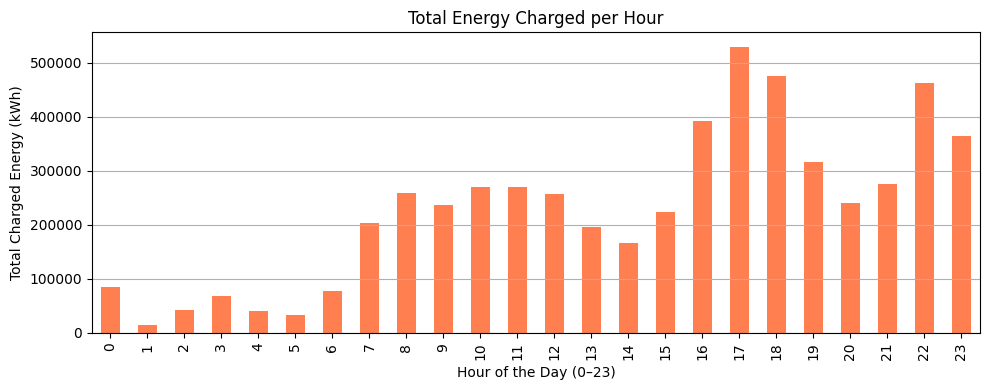

In [71]:
# Plot 2: Total energy charged per hour
plt.figure(figsize=(10, 4))
total_energy_per_hour.plot(kind="bar", color="coral")
plt.title("Total Energy Charged per Hour")
plt.xlabel("Hour of the Day (0–23)")
plt.ylabel("Total Charged Energy (kWh)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#**This bar chart shows the total energy charged (in kWh) for all sessions that started during each hour of the day.**

### **Key Observations:**
- Energy charged is lowest between 1:00 and 5:00, when few sessions occur.

- There is a gradual increase starting at 6:00, peaking at 17:00.

- High charging volumes are seen from 16:00 to 18:00, and again around 22:00–23:00.

### **What does this mean?**
- The total energy demand closely follows session frequency: more buses charging = more energy delivered.

- Peak demand occurs late afternoon, which is critical for infrastructure planning — chargers and power supply must be scaled for this.

The sharp increase in total energy charged between 16:00 - 18:00 and 22.00 - 23.00, most likely reflects the moment when buses return from their daily routes and begin charging at the depot.



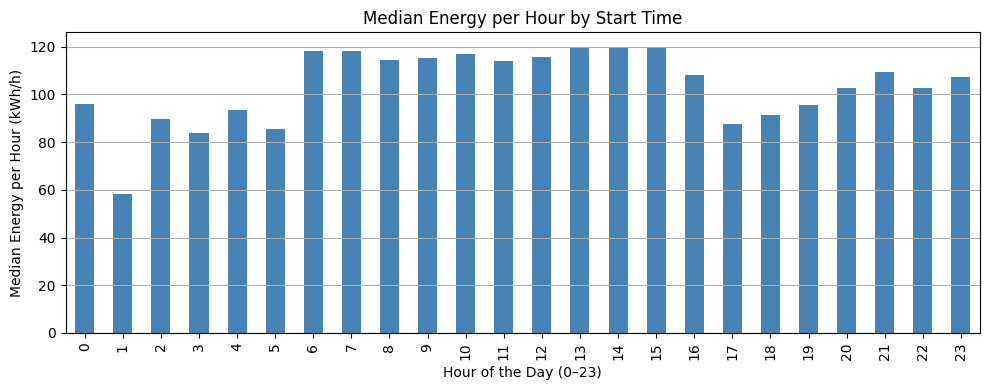

In [72]:
# Plot 3: Median energy per hour
plt.figure(figsize=(10, 4))
median_energy_per_hour.plot(kind="bar", color="steelblue")
plt.title("Median Energy per Hour by Start Time")
plt.xlabel("Hour of the Day (0–23)")
plt.ylabel("Median Energy per Hour (kWh/h)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#**This plot shows the median charging power (kWh/h) based on the hour of the day when a charging session starts.**

### **Key Observations:**
From 6:00 to 15:00, charging power is highest (around 115–120 kWh/h).
- Buses charge fastest during this period.

After 16:00, the charging power drops noticeably.
- This means buses charge slower in the evening.

Charging power is lowest between 1:00 and 2:00, likely due to slower overnight sessions.

### **What does this mean?**
During the day, buses likely return with low battery and charge at full power.

In the evening, they may:

- charge for shorter periods,

- have a higher state of charge (SoC) when they arrive,

- or share power with more buses charging at once.




In [73]:
# Show summary statistics of energy_per_hour
energy_stats

,energy_per_hour
count,51769.000000
mean,93.856757
std,42.477228
min,0.028427
25%,61.492081
50%,110.047025
75%,131.862360
max,169.626488


| Metric     | Meaning                                                | Value          |
| ---------- | ------------------------------------------------------ | -------------- |
| **Count**  | Total number of charging sessions                      | 51,769         |
| **Mean**   | Average charging power across all sessions             | \~93.86 kWh/h  |
| **Std**    | Standard deviation – shows variation in charging power | \~42.48        |
| **Min**    | Lowest observed charging power                         | \~0.03 kWh/h   |
| **25%**    | 25% of sessions had ≤ this value                       | \~61.49 kWh/h  |
| **Median** | 50% of sessions had ≤ this value (middle value)        | \~110.05 kWh/h |
| **75%**    | 75% of sessions had ≤ this value                       | \~131.86 kWh/h |
| **Max**    | Highest observed charging power                        | \~169.63 kWh/h |


# **Feature Importance**





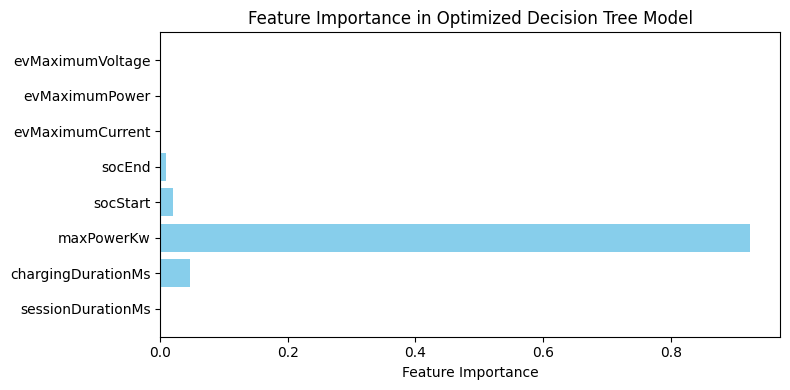

In [74]:
# Create a bar plot for feature importance from the trained decision tree model

# Extract feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 4))
plt.barh(feature_names, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Optimized Decision Tree Model")
plt.tight_layout()
plt.show()


### The model relies mainly on **maxPowerKw**, which strongly influences energy usage. **chargingDurationMs** and socStart have minor impact, while **socEnd** and **startHour** contribute very little. Charging power is the key driver in predictions.